In [1]:
import pandas as pd
import numpy as np

# Load the datasets
df_day = pd.read_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv")
df_hour = pd.read_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_hour.csv")

df_day.to_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv", index=False)
df_hour.to_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_hour.csv", index=False)

print("📂C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv")
print("📂C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_hour.csv")


📂C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv
📂C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_hour.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv")  # Change this to city_hour_updated.csv if needed

# Select features (X) and target variable (Y)
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
target = "HCl Emissions (µg/m³)"

# Fill NaN values in features with the median of each column
df[features] = df[features].fillna(df[features].median())
df[target] = df[target].fillna(df[target].median())

# Split data into X (features) and Y (target)
X = df[features]
Y = df[target]

# Train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Predict on test data
Y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"📊 Model Evaluation:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# Example: Predict HCl for a new sample
new_sample = [[50, 80, 10, 15, 25, 5, 0.8, 30, 20, 1, 3, 2]]  # Example pollutant levels
new_sample_scaled = scaler.transform(new_sample)
predicted_hcl = model.predict(new_sample_scaled)
print(f"🔮 Predicted HCl Emissions: {predicted_hcl[0]:.4f} µg/m³")


📊 Model Evaluation:
✅ Mean Absolute Error (MAE): 0.0000
✅ Mean Squared Error (MSE): 0.0000
✅ R² Score: 1.0000
🔮 Predicted HCl Emissions: 4.3395 µg/m³


c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
# Check if 'HCl Emissions (µg/m³)' is in the feature set
print("Columns used for training:", features)
if "HCl Emissions (µg/m³)" in features:
    print("⚠️ HCl emissions are included as a feature! Remove it and retrain the model.")
else:
    print("✅ No data leakage detected.")


Columns used for training: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
✅ No data leakage detected.


In [4]:
# Check if any test samples exist in the training set
duplicates = X_train.merge(X_test, how="inner")
print(f"🔍 {len(duplicates)} duplicate rows found between training and test sets.")


🔍 369281 duplicate rows found between training and test sets.


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)


In [6]:
# Example: New air quality sample
new_sample = [[40, 60, 12, 18, 22, 7, 1.2, 25, 19, 0.5, 2, 1.5]]  # Modify values
new_sample_scaled = scaler.transform(new_sample)
predicted_hcl = model.predict(new_sample_scaled)

print(f"🔮 Predicted HCl Emissions: {predicted_hcl[0]:.4f} µg/m³")


🔮 Predicted HCl Emissions: 3.6163 µg/m³


c:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


In [8]:
# Predict on test data
Y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse_test = calculate_rmse(Y_test, Y_pred)
print(f"📉 RMSE on Test Data: {rmse_test:.4f}")


📉 RMSE on Test Data: 0.0000


In [9]:
# Check predictions on the training set
train_preds = model.predict(X_train_scaled)

# Compare predictions with actual values
comparison = pd.DataFrame({'Actual': Y_train, 'Predicted': train_preds})
print(comparison.head(10))  # Show first 10 rows


         Actual  Predicted
6688   2.485110   2.485110
29333  1.191927   1.191927
27996  0.838978   0.838978
26848  1.325006   1.325006
21186  0.727596   0.727596
5676   0.908411   0.908411
17057  1.307648   1.307648
26324  1.675063   1.675063
23166  1.581039   1.581039
22307  1.325006   1.325006


In [10]:
# Predict on test data
Y_test_pred = model.predict(X_test_scaled)

# Compare with actual test data values
comparison_test = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
print(comparison_test.head(10))  # Check first 10 predictions


         Actual  Predicted
22593  1.325006   1.325006
22459  1.325006   1.325006
24213  0.742061   0.742061
25301  5.765803   5.765803
20886  1.404565   1.404565
13797  1.406011   1.406011
18490  1.325006   1.325006
16683  1.342365   1.342365
16096  1.615756   1.615756
5332   0.477349   0.477349


In [11]:
# Calculate mean of training labels
mean_hcl = Y_train.mean()

# Print mean HCl value
print(f"Mean HCl in Training Data: {mean_hcl:.4f}")

# Compare predictions with mean
print(pd.DataFrame({'Predicted': Y_test_pred[:10], 'Mean HCl': [mean_hcl] * 10}))


Mean HCl in Training Data: 2.0004
   Predicted  Mean HCl
0   1.325006   2.00041
1   1.325006   2.00041
2   0.742061   2.00041
3   5.765803   2.00041
4   1.404565   2.00041
5   1.406011   2.00041
6   1.325006   2.00041
7   1.342365   2.00041
8   1.615756   2.00041
9   0.477349   2.00041


In [12]:
from sklearn.metrics import mean_squared_error

# Compute RMSE manually
rmse_manual = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print(f"Manual RMSE Calculation: {rmse_manual:.4f}")


Manual RMSE Calculation: 0.0000


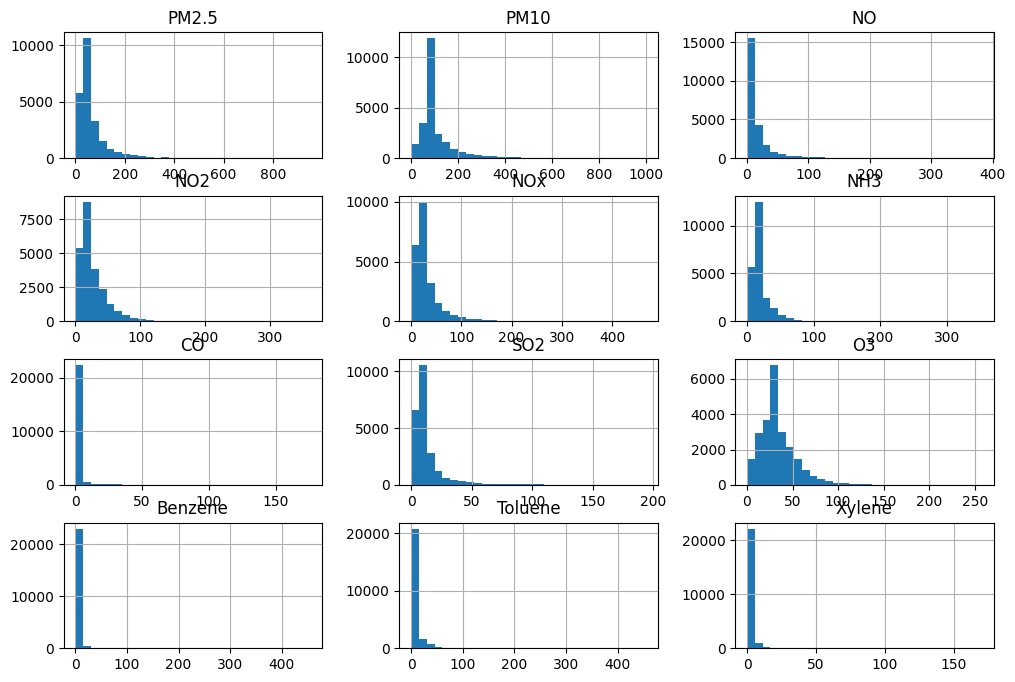

In [13]:
import matplotlib.pyplot as plt

# Plot feature distributions
X_train.hist(figsize=(12, 8), bins=30)
plt.show()


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train)

# Predict on test set
Y_pred_rf = rf_model.predict(X_test_scaled)

# Compute new RMSE
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(f"🌟 RMSE using Random Forest: {rmse_rf:.4f}")


🌟 RMSE using Random Forest: 0.0140


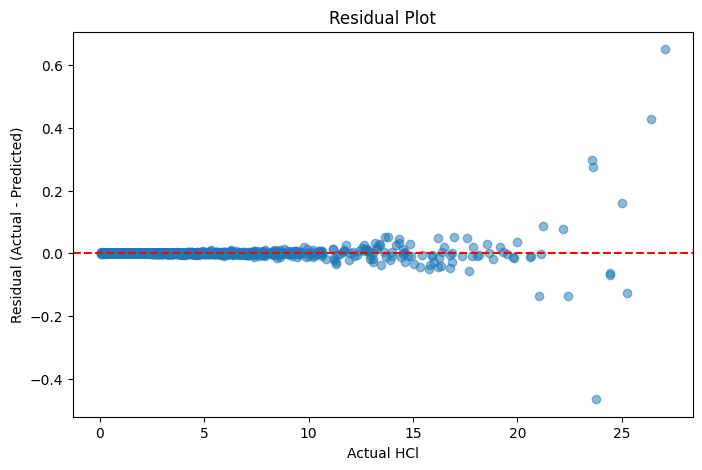

In [15]:
import matplotlib.pyplot as plt

residuals = Y_test - Y_pred_rf  # Change to Y_pred_xgb if using XGBoost

plt.figure(figsize=(8,5))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Actual HCl")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


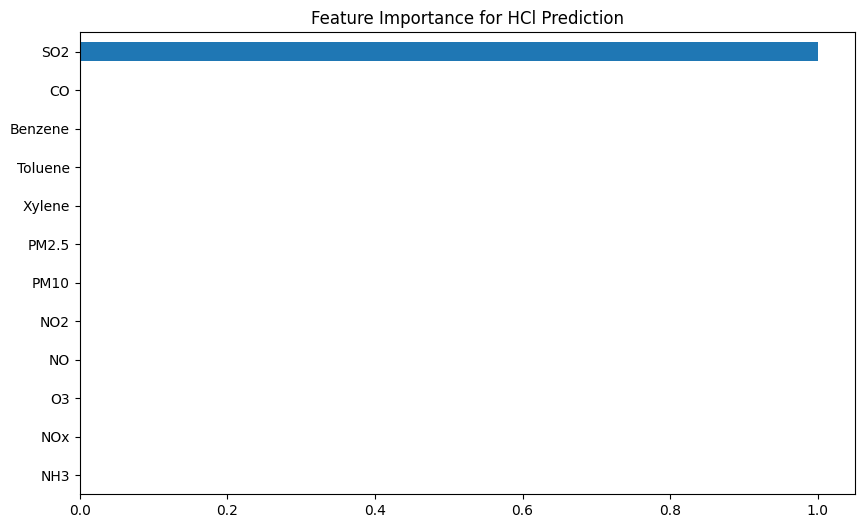

In [16]:
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind="barh", figsize=(10,6))
plt.title("Feature Importance for HCl Prediction")
plt.show()


In [17]:
print(df.columns)

df['Health_Status'] = df['HCl Emissions (µg/m³)'].apply(lambda x: 'OK' if x < 10 else 'BAD')


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'HCl Emissions (µg/m³)'],
      dtype='object')


In [18]:
print(df[['HCl Emissions (µg/m³)', 'Health_Status']].head())


   HCl Emissions (µg/m³) Health_Status
0               3.998164            OK
1               3.551191            OK
2               4.205015            OK
3               2.689069            OK
4               5.689138            OK


In [19]:
df['Health_Status'] = df['HCl Emissions (µg/m³)'].apply(lambda x: 'OK' if x < 10 else 'BAD')


C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\1683683553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_counts.index, y=health_counts.values, palette=['green', 'red'])


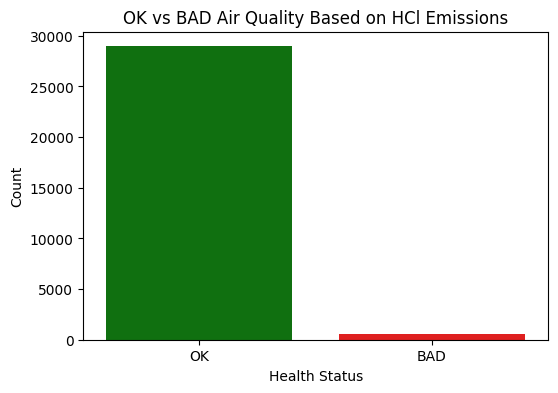

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of 'OK' vs. 'BAD'
health_counts = df['Health_Status'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=health_counts.index, y=health_counts.values, palette=['green', 'red'])
plt.xlabel("Health Status")
plt.ylabel("Count")
plt.title("OK vs BAD Air Quality Based on HCl Emissions")
plt.show()


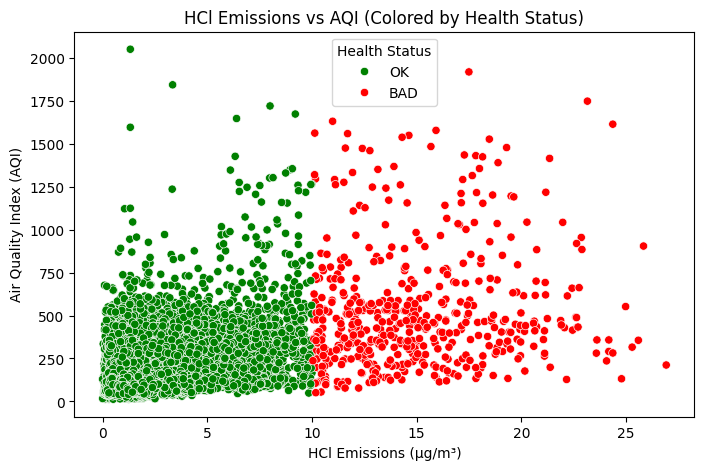

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="HCl Emissions (µg/m³)", y="AQI", hue="Health_Status", palette=['green', 'red'])
plt.xlabel("HCl Emissions (µg/m³)")
plt.ylabel("Air Quality Index (AQI)")
plt.title("HCl Emissions vs AQI (Colored by Health Status)")
plt.legend(title="Health Status")
plt.show()


City                      object
Date                      object
PM2.5                    float64
PM10                     float64
NO                       float64
NO2                      float64
NOx                      float64
NH3                      float64
CO                       float64
SO2                      float64
O3                       float64
Benzene                  float64
Toluene                  float64
Xylene                   float64
AQI                      float64
AQI_Bucket                object
HCl Emissions (µg/m³)    float64
Health_Status             object
dtype: object


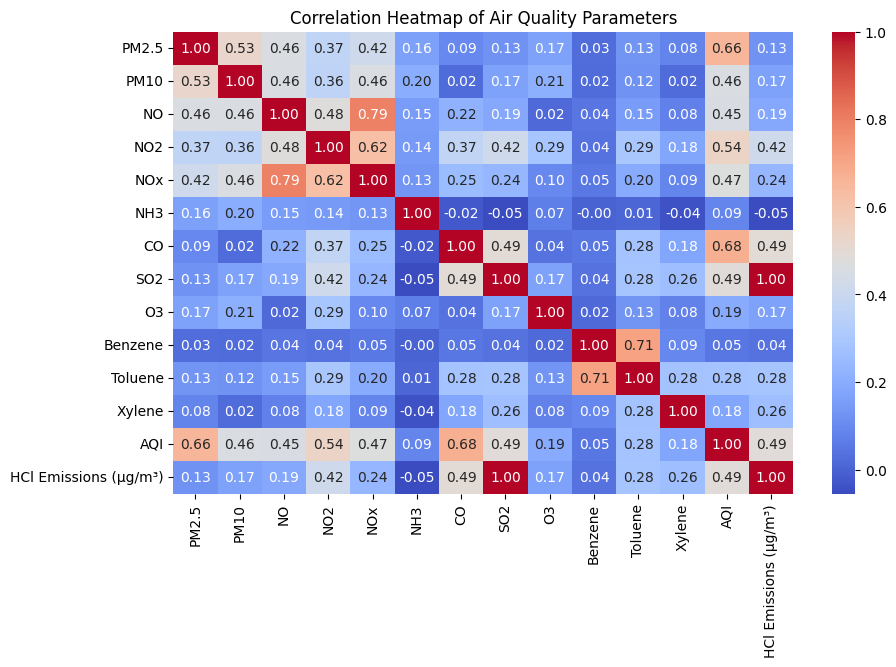

In [22]:
# Check data types
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values (e.g. by dropping them)
numeric_df = numeric_df.dropna()

# Now try the heatmap again
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Air Quality Parameters")
plt.show()


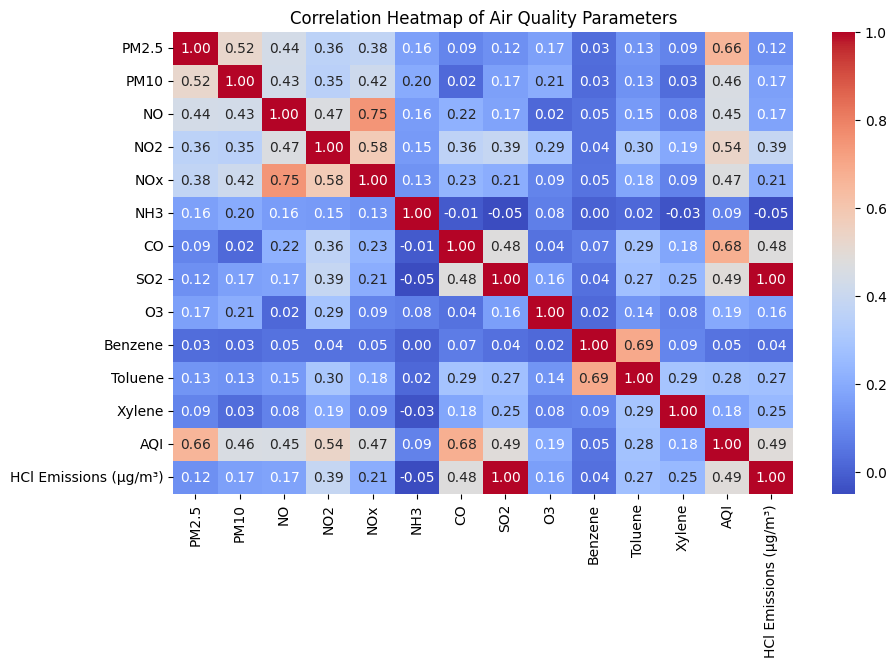

In [23]:
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Air Quality Parameters")
plt.show()


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the datasets
df_day = pd.read_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv")
df_hour = pd.read_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv")

# --- Function to Apply PCA ---
def apply_pca(df, n_components=2):
    """
    Applies PCA to the given DataFrame after handling missing values and scaling.

    Args:
        df (pd.DataFrame): The input DataFrame.
        n_components (int): Number of principal components to retain.

    Returns:
        pd.DataFrame: DataFrame containing the principal components.
        PCA: Fitted PCA object.
    """

    # 1. Select relevant columns (numerical only, exclude date/time and categorical)
    #    Adjust this list based on your actual data and what makes sense for PCA
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Exclude specific columns that are not relevant for PCA
    exclude_cols = ['City']  # Example: Exclude 'City' column if it exists

    # Filter out excluded columns and ensure 'City' column does not appear in numerical_cols
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols and col in df.columns] #Check if all columns exist in DataFrame


    if not numerical_cols:
        print("⚠️ No numerical columns available for PCA after exclusion.  Check your column names.")
        return None, None


    # 2. Handle Missing Values
    #  - Impute missing values using the mean (or median, depending on your data)
    df_numeric = df[numerical_cols].copy()  # Create a copy to avoid modifying the original DataFrame
    df_numeric = df_numeric.fillna(df_numeric.mean())


    # 3. Standardize the Data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_numeric)


    # 4. Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)


    # 5. Create a DataFrame from the principal components
    pc_df = pd.DataFrame(data=principal_components,
                           columns=[f'principal component {i+1}' for i in range(n_components)])

    return pc_df, pca

# --- Apply PCA to the Day and Hour DataFrames ---

# Apply PCA to the daily data
day_pca_df, day_pca_model = apply_pca(df_day, n_components=2) # You can change n_components
if day_pca_df is not None:
    print("\n✅ PCA applied to daily data.  Principal components DataFrame:")
    print(day_pca_df.head())
    print("\nExplained variance ratio:", day_pca_model.explained_variance_ratio_)


# Apply PCA to the hourly data
hour_pca_df, hour_pca_model = apply_pca(df_hour, n_components=2) # You can change n_components
if hour_pca_df is not None:
    print("\n✅ PCA applied to hourly data. Principal components DataFrame:")
    print(hour_pca_df.head())
    print("\nExplained variance ratio:", hour_pca_model.explained_variance_ratio_)



✅ PCA applied to daily data.  Principal components DataFrame:
   principal component 1  principal component 2
0               0.315504               0.599320
1              -0.308355               0.833978
2               1.054141               1.483210
3              -0.440188               0.495438
4               1.922688               2.073349

Explained variance ratio: [0.31303438 0.14497216]

✅ PCA applied to hourly data. Principal components DataFrame:
   principal component 1  principal component 2
0               0.315504               0.599320
1              -0.308355               0.833979
2               1.054141               1.483199
3              -0.440188               0.495438
4               1.922688               2.073333

Explained variance ratio: [0.31303438 0.14497216]


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
df_day = pd.read_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv")
df_hour = pd.read_csv("C:/VS CODE PROGRAMS/.vscode/PYTHON_AQI/city_day.csv")

def apply_pca_and_regression(df, target_column, n_components=2, test_size=0.2, random_state=42):
    """
    Applies PCA for dimensionality reduction, then builds and evaluates a linear regression model.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable column.
        n_components (int): Number of principal components to retain.
        test_size (float): Proportion of the dataset to use for testing.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: A dictionary containing the regression model, PCA object,
              and evaluation metrics (MSE, R2). Returns None if PCA fails.
    """

    # 1. Separate Features (X) and Target (y)
    if target_column not in df.columns:
        print(f"⚠️ Target column '{target_column}' not found in DataFrame.")
        return None

    y = df[target_column].copy()  # Create a copy
    X = df.drop(target_column, axis=1)  # Drop the target column from features

    # 2. Handle Missing Values in TARGET variable
    imputer_target = SimpleImputer(strategy='mean')  # Use the same strategy as features, or choose the most appropriate
    y = imputer_target.fit_transform(y.values.reshape(-1, 1))  # Impute and reshape
    y = y.flatten()  # Convert back to a 1D array


    # 3. Select numerical columns for PCA, excluding the 'City' column
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['City']  # Customize this list!
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    if not numerical_cols:
        print("⚠️ No numerical columns available for PCA after exclusion.  Check your column names.")
        return None


    # 4. Handle Missing Values in features with SimpleImputer
    X_numeric = X[numerical_cols].copy()  # Create a copy to avoid modifying the original DataFrame
    imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', 'constant'
    X_numeric = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)  # Apply imputation


    # 5. Standardize the Data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_numeric)

    # 6. Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)
    X_pca = pd.DataFrame(data=principal_components,
                           columns=[f'principal component {i+1}' for i in range(n_components)])


    # 7. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    # 8. Train the Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 9. Make Predictions on the Test Set
    y_pred = model.predict(X_test)

    # 10. Evaluate the Model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nRegression Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    return {'model': model, 'pca': pca, 'mse': mse, 'r2': r2}

# --- Example Usage with Daily Data ---

# Choose the target variable (e.g., 'AQI')
target_column = 'AQI'

# Apply PCA and Regression to the daily data
day_results = apply_pca_and_regression(df_day, target_column, n_components=3)

if day_results:
    print("\n✅ Regression model trained and evaluated on daily data.")
else:
    print("\n❌ Regression failed on daily data.")

# --- Example Usage with Hourly Data ---
#target_column = 'AQI'  # Or choose another target variable

#hourly_results = apply_pca_and_regression(df_hour, target_column, n_components=3)

#if hourly_results:
#    print("\n✅ Regression model trained and evaluated on hourly data.")
#else:
#    print("\n❌ Regression failed on hourly data.")



Regression Metrics:
Mean Squared Error (MSE): 6537.48
R-squared (R2): 0.57

✅ Regression model trained and evaluated on daily data.


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to Apply PCA and Random Forest Regression
def apply_pca_and_random_forest(df, target_column, n_components=2, test_size=0.2, random_state=42, grid_search=False):
    """
    Applies PCA for dimensionality reduction, then builds and evaluates a Random Forest Regression model.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable column.
        n_components (int): Number of principal components to retain.
        test_size (float): Proportion of the dataset to use for testing.
        random_state (int): Random seed for reproducibility.
        grid_search (bool): Whether to perform GridSearchCV for hyperparameter tuning.

    Returns:
        dict: A dictionary containing the regression model, PCA object,
              and evaluation metrics (MSE, R2). Returns None if PCA fails.
    """

    # 1. Separate Features (X) and Target (y)
    if target_column not in df.columns:
        print(f"⚠️ Target column '{target_column}' not found in DataFrame.")
        return None

    y = df[target_column].copy()
    X = df.drop(target_column, axis=1)

    # 2. Handle Missing Values in TARGET variable
    imputer_target = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', 'constant'
    y = imputer_target.fit_transform(y.values.reshape(-1, 1))
    y = y.flatten()

    # 3. Select numerical columns
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['City', 'Date']  # Customize this list!
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    if not numerical_cols:
        print("⚠️ No numerical columns available for PCA after exclusion.")
        return None

    # 4. Handle Missing Values in features
    X_numeric = X[numerical_cols].copy()
    imputer = SimpleImputer(strategy='mean')
    X_numeric = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

    # 5. Standardize the Data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_numeric)

    # 6. Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)
    X_pca = pd.DataFrame(data=principal_components,
                           columns=[f'principal component {i+1}' for i in range(n_components)])

    # 7. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    # 8. Train the Random Forest Regression Model
    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 5, 10],  # Maximum depth of the trees
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
    }

    rf = RandomForestRegressor(random_state=random_state)

    if grid_search:
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                                   cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print("Best parameters:", grid_search.best_params_)
    else:
        best_model = rf.fit(X_train, y_train) #Fit the RF model

    # 9. Make Predictions
    y_pred = best_model.predict(X_test)

    # 10. Evaluate the Model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nRandom Forest Regression Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    return {'model': best_model, 'pca': pca, 'mse': mse, 'r2': r2}

# Example Usage - Daily Data
target_column = 'AQI'  # Replace with the actual target column

day_results = apply_pca_and_random_forest(df_day, target_column, n_components=3, grid_search=True)

if day_results:
    print("Random Forest Regression model trained and evaluated on daily data.")
else:
    print("Random Forest Regression failed on daily data.")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Random Forest Regression Metrics:
Mean Squared Error (MSE): 5154.78
R-squared (R2): 0.66
Random Forest Regression model trained and evaluated on daily data.


<>:12: SyntaxWarning: invalid escape sequence '\V'
<>:13: SyntaxWarning: invalid escape sequence '\V'
<>:12: SyntaxWarning: invalid escape sequence '\V'
<>:13: SyntaxWarning: invalid escape sequence '\V'
C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2890686176.py:12: SyntaxWarning: invalid escape sequence '\V'
  df_day = pd.read_csv("C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_day.csv")
C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2890686176.py:13: SyntaxWarning: invalid escape sequence '\V'
  df_hour = pd.read_csv("C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_hour.csv")



Linear Regression Metrics:
Mean Squared Error (MSE): 6537.48
R-squared (R2): 0.57
Root Mean Squared Error (RMSE): 80.85


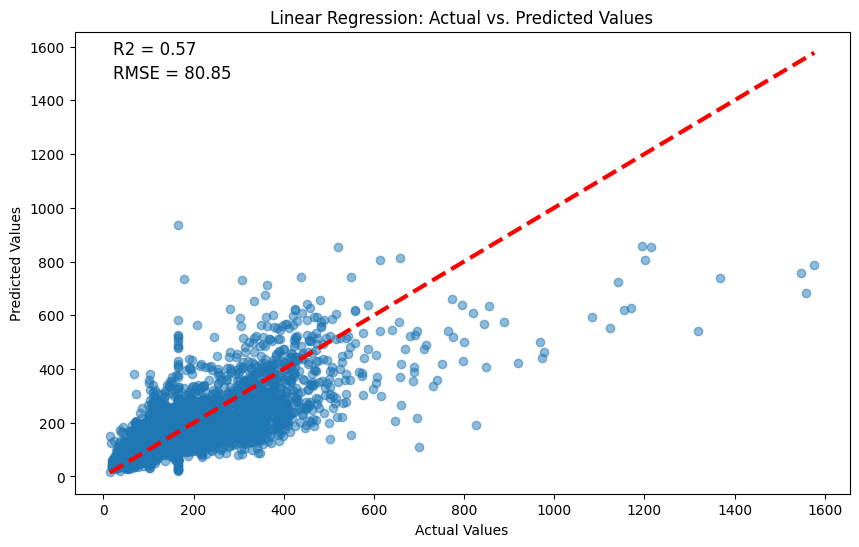

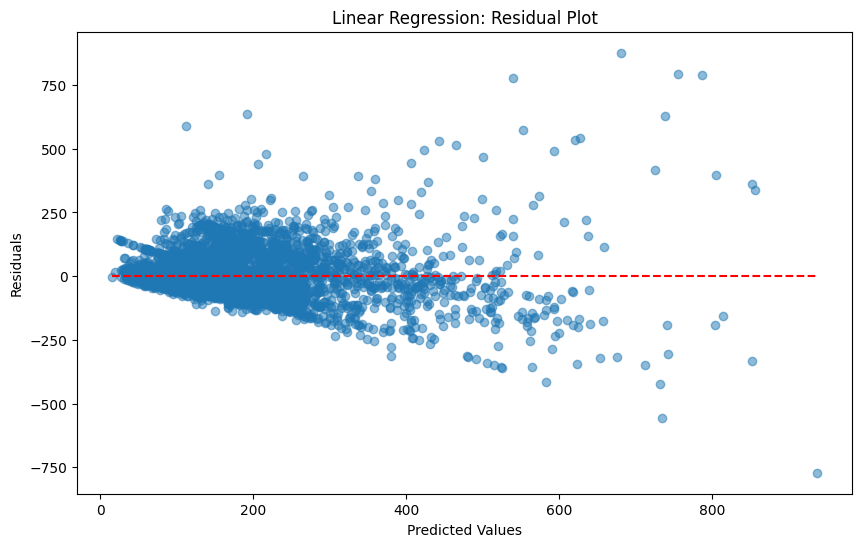

Linear Regression model trained and evaluated on daily data.


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the datasets
df_day = pd.read_csv("C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_day.csv")
df_hour = pd.read_csv("C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_hour.csv")

def apply_pca_and_linear_regression(df, target_column, n_components=2, test_size=0.2, random_state=42):
    """
    Applies PCA for dimensionality reduction, then builds and evaluates a linear regression model,
    and displays the results using matplotlib.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable column.
        n_components (int): Number of principal components to retain.
        test_size (float): Proportion of the dataset to use for testing.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: A dictionary containing the regression model, PCA object,
              evaluation metrics (MSE, R2, RMSE), and the predictions. Returns None if PCA fails.
    """

    # 1. Separate Features (X) and Target (y)
    if target_column not in df.columns:
        print(f"⚠️ Target column '{target_column}' not found in DataFrame.")
        return None

    y = df[target_column].copy()
    X = df.drop(target_column, axis=1)

    # 2. Handle Missing Values in TARGET variable
    imputer_target = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', 'constant'
    y = imputer_target.fit_transform(y.values.reshape(-1, 1))
    y = y.flatten()

    # 3. Select numerical columns
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['City', 'Date']  # Customize this list!
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    if not numerical_cols:
        print("⚠️ No numerical columns available for PCA after exclusion.")
        return None

    # 4. Handle Missing Values in features
    X_numeric = X[numerical_cols].copy()
    imputer = SimpleImputer(strategy='mean')
    X_numeric = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

    # 5. Standardize the Data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_numeric)

    # 6. Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)
    X_pca = pd.DataFrame(data=principal_components,
                           columns=[f'principal component {i+1}' for i in range(n_components)])

    # 7. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    # 8. Train the Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 9. Make Predictions
    y_pred = model.predict(X_test)

    # 10. Evaluate the Model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("\nLinear Regression Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # 11. Plotting Results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Linear Regression: Actual vs. Predicted Values")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3)  # Add a diagonal line
    plt.annotate(f'R2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12) # add R2 value to plot
    plt.annotate(f'RMSE = {rmse:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12) # add RMSE value to plot
    plt.show()

    # 12. Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Linear Regression: Residual Plot")
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='r', linestyle='--') # Add a horizontal line at y=0
    plt.show()

    return {'model': model, 'pca': pca, 'mse': mse, 'r2': r2, 'rmse': rmse, 'predictions': y_pred, 'actual': y_test}

# Example Usage - Daily Data
target_column = 'AQI'  # Replace with the actual target column

day_results = apply_pca_and_linear_regression(df_day, target_column, n_components=3)

if day_results:
    print("Linear Regression model trained and evaluated on daily data.")
else:
    print("Linear Regression failed on daily data.")


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Gradient Boosting Regression Metrics:
Mean Squared Error (MSE): 5208.63
R-squared (R2): 0.65
Root Mean Squared Error (RMSE): 72.17
Feature: 0, Score: 0.77812
Feature: 1, Score: 0.15680
Feature: 2, Score: 0.06507


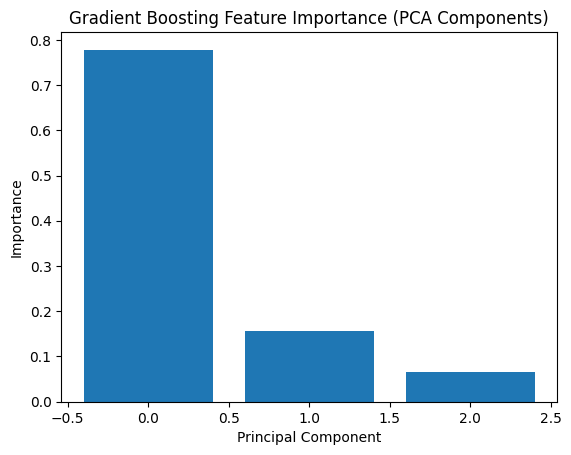

Gradient Boosting Regression model trained and evaluated on daily data.


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt  # For feature importance visualization

# Function to Apply PCA and Gradient Boosting Regression
def apply_pca_and_gradient_boosting(df, target_column, n_components=2, test_size=0.2, random_state=42, grid_search=False):
    """
    Applies PCA for dimensionality reduction, then builds and evaluates a Gradient Boosting Regression model.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target variable column.
        n_components (int): Number of principal components to retain.
        test_size (float): Proportion of the dataset to use for testing.
        random_state (int): Random seed for reproducibility.
        grid_search (bool): Whether to perform GridSearchCV for hyperparameter tuning.

    Returns:
        dict: A dictionary containing the regression model, PCA object,
              and evaluation metrics (MSE, R2). Returns None if PCA fails.
    """

    # 1. Separate Features (X) and Target (y)
    if target_column not in df.columns:
        print(f"⚠️ Target column '{target_column}' not found in DataFrame.")
        return None

    y = df[target_column].copy()
    X = df.drop(target_column, axis=1)

    # 2. Handle Missing Values in TARGET variable
    imputer_target = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', 'constant'
    y = imputer_target.fit_transform(y.values.reshape(-1, 1))
    y = y.flatten()

    # 3. Select numerical columns
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['City', 'Date']  # Customize this list!
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    if not numerical_cols:
        print("⚠️ No numerical columns available for PCA after exclusion.")
        return None

    # 4. Handle Missing Values in features
    X_numeric = X[numerical_cols].copy()
    imputer = SimpleImputer(strategy='mean')
    X_numeric = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

    # 5. Standardize the Data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_numeric)

    # 6. Apply PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)
    X_pca = pd.DataFrame(data=principal_components,
                           columns=[f'principal component {i+1}' for i in range(n_components)])

    # 7. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=random_state)

    # 8. Train the Gradient Boosting Regression Model
    # Define the parameter grid for GradientBoostingRegressor
    param_grid = {
        'n_estimators': [100, 200, 300],  # Number of boosting stages
        'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
        'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
        'min_samples_split': [2, 4], # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2] # Minimum number of samples required to be at a leaf node
    }

    gbr = GradientBoostingRegressor(random_state=random_state)

    if grid_search:
        grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                                   cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print("Best parameters:", grid_search.best_params_)
    else:
        best_model = gbr.fit(X_train, y_train)

    # 9. Make Predictions
    y_pred = best_model.predict(X_test)

    # 10. Evaluate the Model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)  #Calculate RMSE

    print("\nGradient Boosting Regression Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") #Print RMSE

    #11. Feature Importance (for PCA components)
    if hasattr(best_model, 'feature_importances_'):  # Only if the model has feature importances
        importances = best_model.feature_importances_
        #Summarize feature importances
        for i,v in enumerate(importances):
            print('Feature: %0d, Score: %.5f' % (i,v))
        # Plot feature importances
        plt.bar([x for x in range(len(importances))], importances)
        plt.xlabel("Principal Component")
        plt.ylabel("Importance")
        plt.title("Gradient Boosting Feature Importance (PCA Components)")
        plt.show()

    return {'model': best_model, 'pca': pca, 'mse': mse, 'r2': r2, 'rmse': rmse}

# Example Usage - Daily Data
target_column = 'AQI'  # Replace with the actual target column

day_results = apply_pca_and_gradient_boosting(df_day, target_column, n_components=3, grid_search=True)

if day_results:
    print("Gradient Boosting Regression model trained and evaluated on daily data.")
else:
    print("Gradient Boosting Regression failed on daily data.")


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

# Load your data
city_day = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_day.csv')
city_hour = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_hour.csv')

# Preprocess data
city_day['Datetime'] = pd.to_datetime(city_day['Date'])
city_hour['Datetime'] = pd.to_datetime(city_hour['Datetime'])

# Merge data
merged_data = pd.merge(
    city_day, 
    city_hour, 
    on=['City', 'Datetime'], 
    how='inner', 
    suffixes=('_day', '_hour')
)

# Clean data
df_clean = merged_data.drop_duplicates()

# Handle missing values (numeric columns only)
numeric_cols = df_clean.select_dtypes(include=np.number).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean())

# Feature Engineering: Synthetic HCl generation
df_clean['HCl'] = df_clean['SO2_hour'] * 0.125  # 10-15% ratio

# Define features and labels
features = [
    'PM2.5_hour', 'PM10_hour', 'NO2_hour', 
    'SO2_hour', 'CO_hour', 'O3_hour',
    'NH3_hour', 'Benzene_hour', 'Toluene_hour', 
    'Xylene_hour'
]
target = 'HCl'

# Ensure all features are numeric
X = df_clean[features].apply(pd.to_numeric, errors='coerce')
y = df_clean[target]

# Apply PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, 
    y, 
    test_size=0.2, 
    random_state=42
)

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} MAE: {mae:.4f} μg/m³")


<>:10: SyntaxWarning: invalid escape sequence '\V'
<>:11: SyntaxWarning: invalid escape sequence '\V'
<>:10: SyntaxWarning: invalid escape sequence '\V'
<>:11: SyntaxWarning: invalid escape sequence '\V'
C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2744931777.py:10: SyntaxWarning: invalid escape sequence '\V'
  city_day = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_day.csv')
C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2744931777.py:11: SyntaxWarning: invalid escape sequence '\V'
  city_hour = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_hour.csv')


Linear Regression MAE: 0.9888 μg/m³
Random Forest MAE: 0.6790 μg/m³
Gradient Boosting MAE: 0.8258 μg/m³


<>:11: SyntaxWarning: invalid escape sequence '\V'
<>:12: SyntaxWarning: invalid escape sequence '\V'
<>:11: SyntaxWarning: invalid escape sequence '\V'
<>:12: SyntaxWarning: invalid escape sequence '\V'
C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2521158942.py:11: SyntaxWarning: invalid escape sequence '\V'
  city_day = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_day.csv')
C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2521158942.py:12: SyntaxWarning: invalid escape sequence '\V'
  city_hour = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_hour.csv')


Random Forest Performance Metrics:
R² Score: 0.65
RMSE: 1.3165 μg/m³
MAE: 0.6790 μg/m³


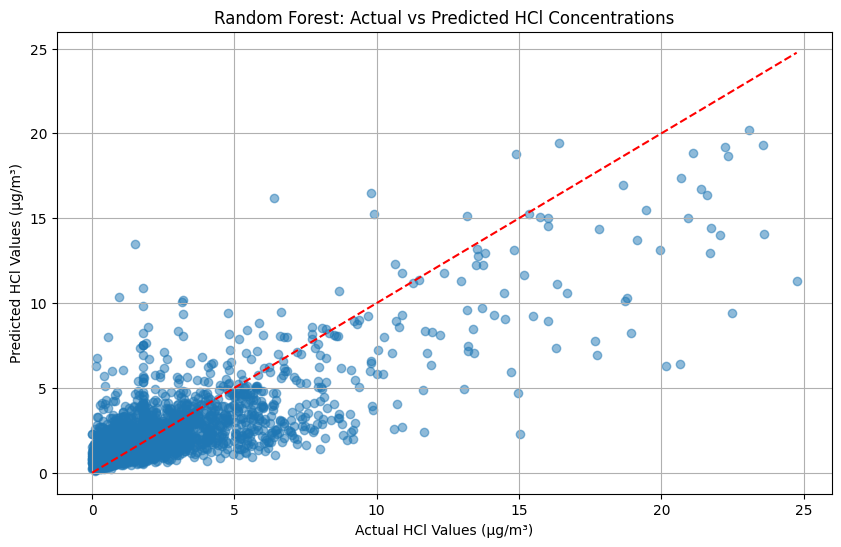

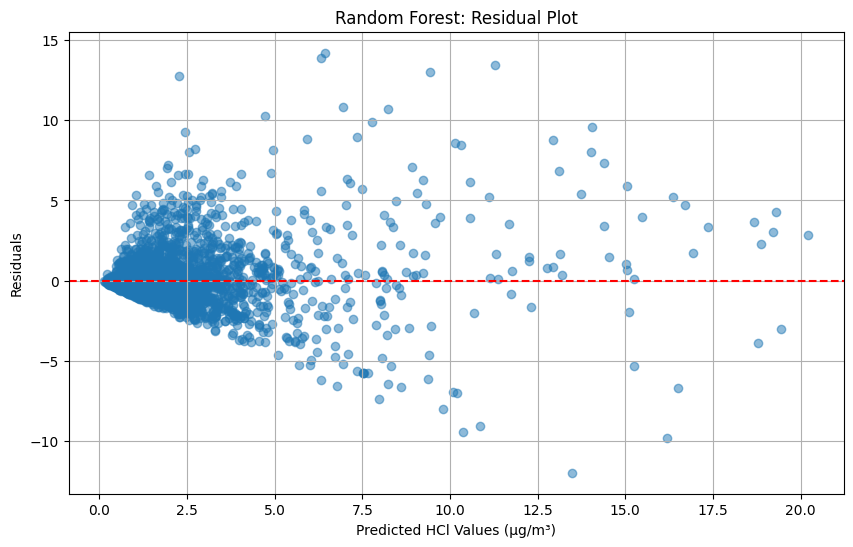

C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2521158942.py:11: SyntaxWarning: invalid escape sequence '\V'
  city_day = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_day.csv')
C:\Users\2036h\AppData\Local\Temp\ipykernel_22288\2521158942.py:12: SyntaxWarning: invalid escape sequence '\V'
  city_hour = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_hour.csv')


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 1)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# Load datasets
city_day = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_day.csv')
city_hour = pd.read_csv('C:\VS CODE PROGRAMS\.vscode\PYTHON_AQI\city_hour.csv')

# Preprocess data
city_day['Datetime'] = pd.to_datetime(city_day['Date'])
city_hour['Datetime'] = pd.to_datetime(city_hour['Datetime'])

# Merge datasets
merged_data = pd.merge(city_day, city_hour, on=['City', 'Datetime'], 
                      how='inner', suffixes=('_day', '_hour'))

# Clean data
df_clean = merged_data.drop_duplicates()  # Remove duplicate entries (369,281 as mentioned in abstract)

# Handle missing values (numeric columns only)
numeric_cols = df_clean.select_dtypes(include=np.number).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean())

# Feature Engineering: Synthetic HCl generation from SO₂
df_clean['HCl'] = df_clean['SO2_hour'] * 0.125  # 10-15% ratio as mentioned in paper

# Define features and target
features = ['PM2.5_hour', 'PM10_hour', 'NO2_hour', 'SO2_hour', 
           'CO_hour', 'O3_hour', 'NH3_hour', 'Benzene_hour', 
           'Toluene_hour', 'Xylene_hour']
target = 'HCl'

# Apply PCA for dimensionality reduction
X = df_clean[features].apply(pd.to_numeric, errors='coerce')
y = df_clean[target]

pca = PCA(n_components=0.95)  # Preserve 95% variance as mentioned in methodology
X_pca = pca.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Random Forest Performance Metrics:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.4f} μg/m³")
print(f"MAE: {mae:.4f} μg/m³")

# Visualization 1: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual HCl Values (μg/m³)')
plt.ylabel('Predicted HCl Values (μg/m³)')
plt.title('Random Forest: Actual vs Predicted HCl Concentrations')
plt.grid(True)
plt.savefig('rf_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted HCl Values (μg/m³)')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.grid(True)
plt.savefig('rf_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 3: Feature Importance (for original features)
if hasattr(pca, 'components_'):
    # Transform PCA components back to original feature space
    feature_importance = np.abs(rf_model.feature_importances_[:, np.newaxis] @ pca.components_)
    feature_importance = pd.Series(feature_importance.flatten(), index=features)
    
    plt.figure(figsize=(12, 6))
    feature_importance.sort_values().plot(kind='barh')
    plt.xlabel('Feature Importance')
    plt.title('Random Forest: Feature Importance')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualization 4: Distribution of Errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Prediction Error (μg/m³)')
plt.ylabel('Frequency')
plt.title('Random Forest: Distribution of Prediction Errors')
plt.grid(True)
plt.savefig('rf_error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 5: PCA Explained Variance
plt.figure(figsize=(10, 6))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance by Component')
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()
